# Visualization of intermediate activation values

The visualization of intermediate actionvation values means taht for a given input, the returen values of the various convoluation and aggregation layers in the model are displayed (the output of a layer is usually called the activation value of that layer, that is, the output of the avtivation functions).

This allows you to see how an input is broken down into different filters, which are learned by the neural network. We want to visualize the feature map in 3 dimensions: Height, Width, and depth(Channels).

Each channel corresponds to a relatively independent feature, so the correct way to visualize these feature maps is to plots the cotents of each channel separately as a two-dimensional image.

In [ ]:
from tensorflow import keras

model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

In [ ]:
!unzip -qq "/content/Smaple_images.zip"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Preprocssing a single image

In [ ]:
import numpy as np

img_path = "/content/cat.jpg"

def get_img_array(img_path, target_size):
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

In [ ]:
img_tensor.shape

(1, 180, 180, 3)

Displaying the test image

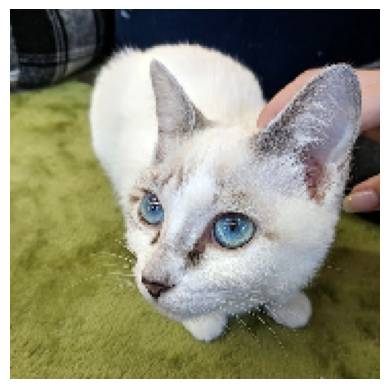

In [ ]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [ ]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

Using the model to compute the layers' activation values

In [ ]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


In [ ]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 178, 178, 32)

Visualizing the channel

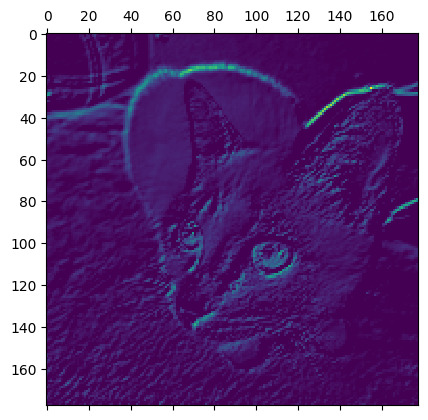

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap="viridis")

## Visualizing every channel in every intermediate activation

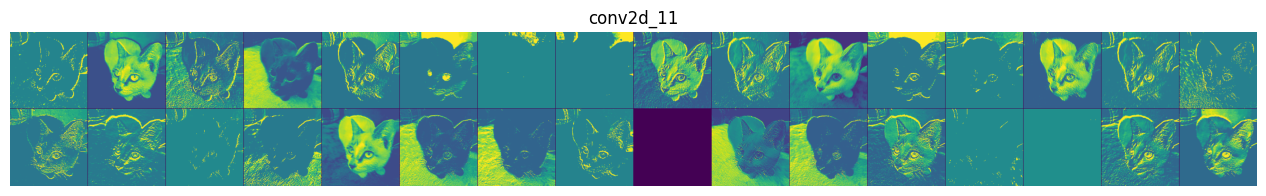

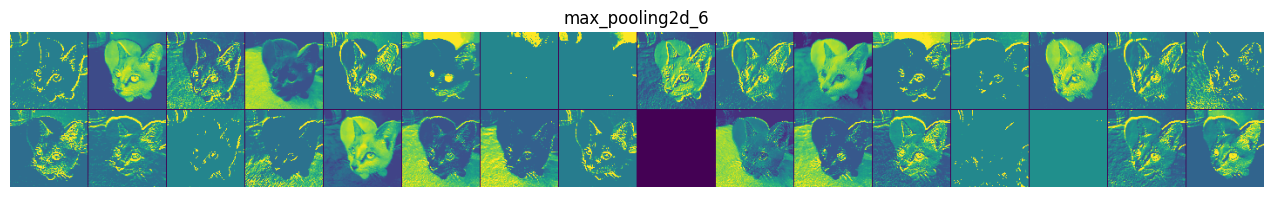

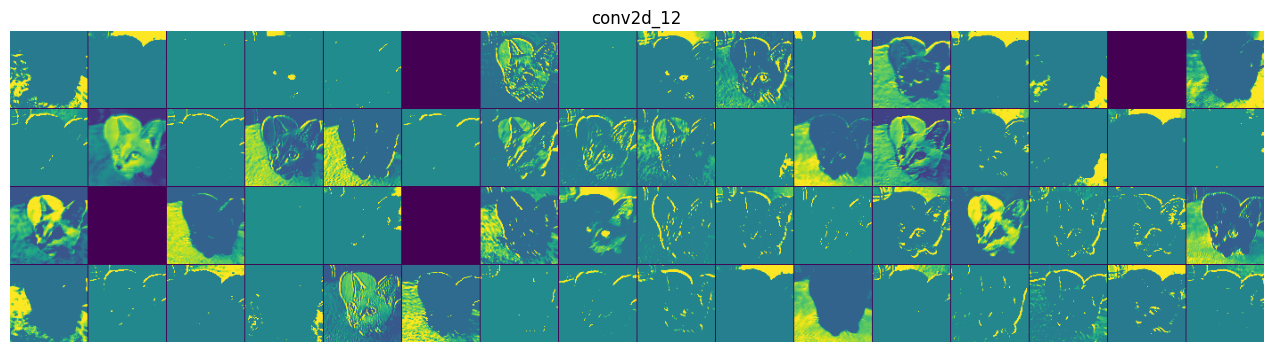

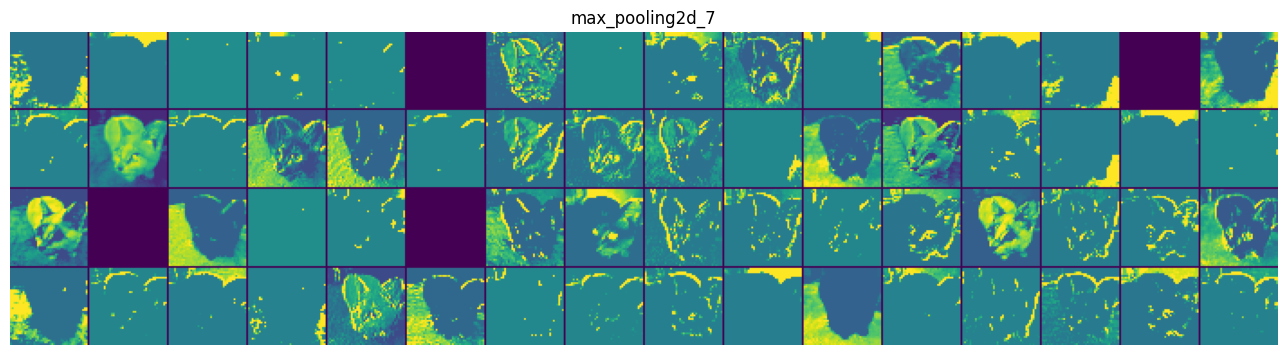

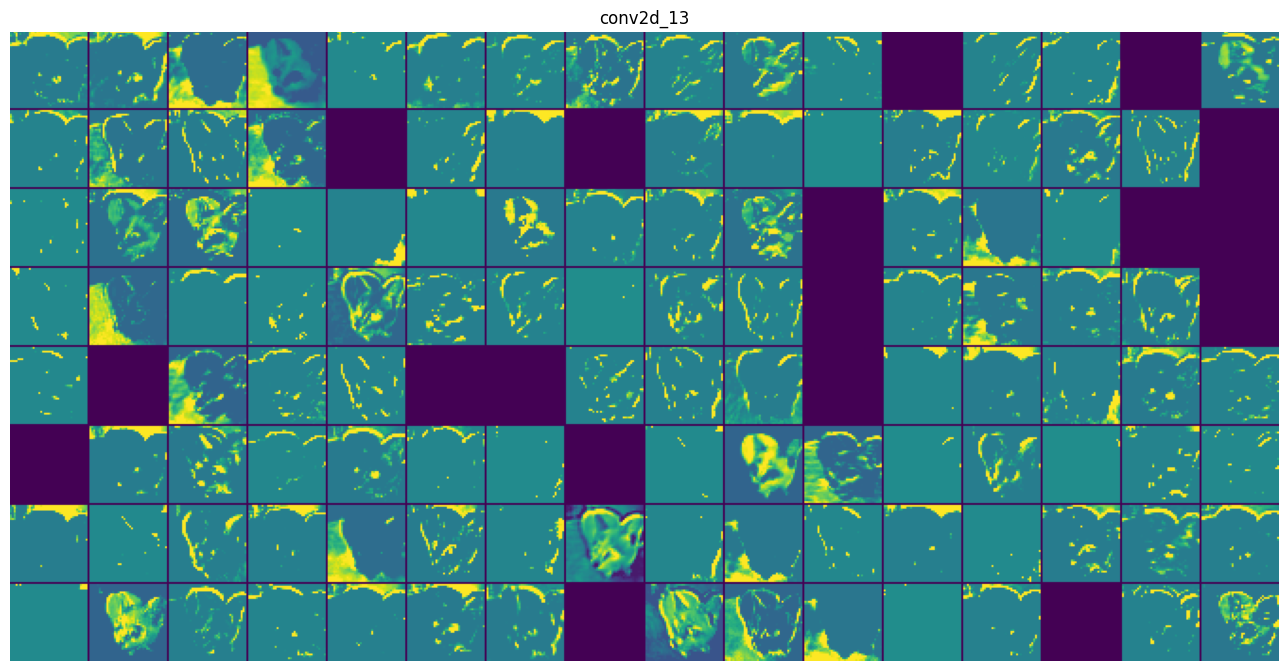

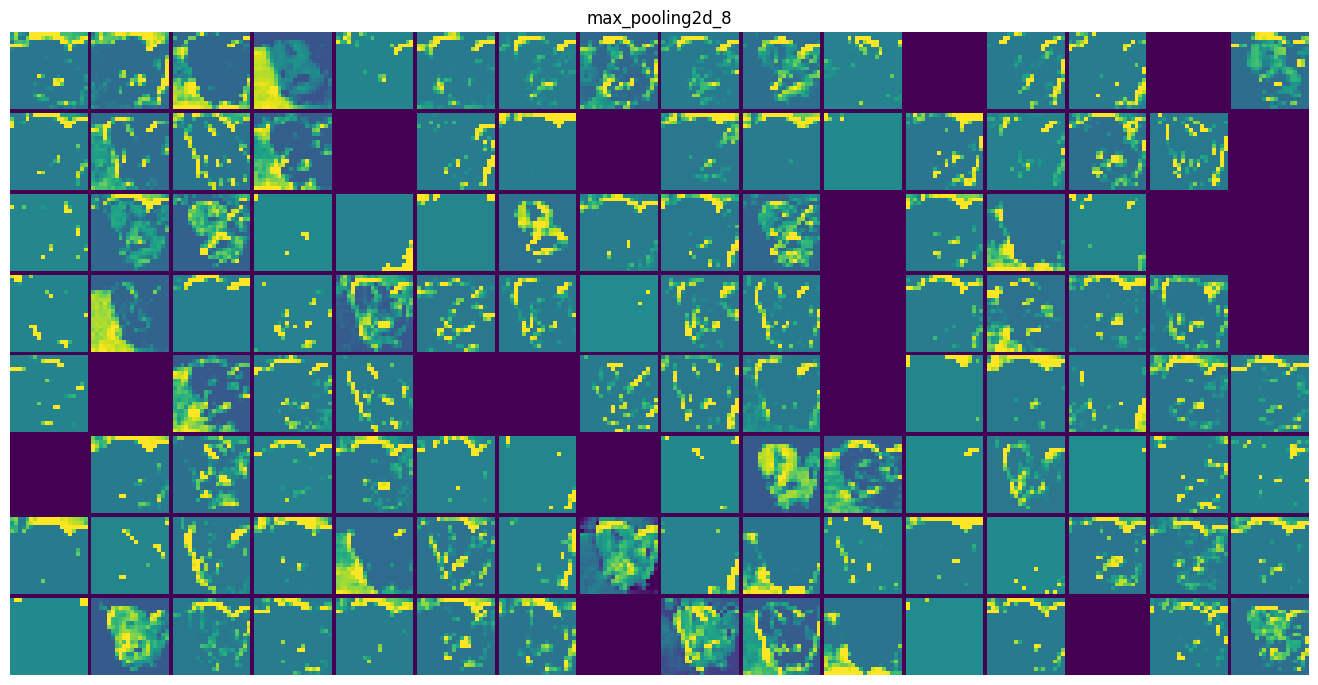

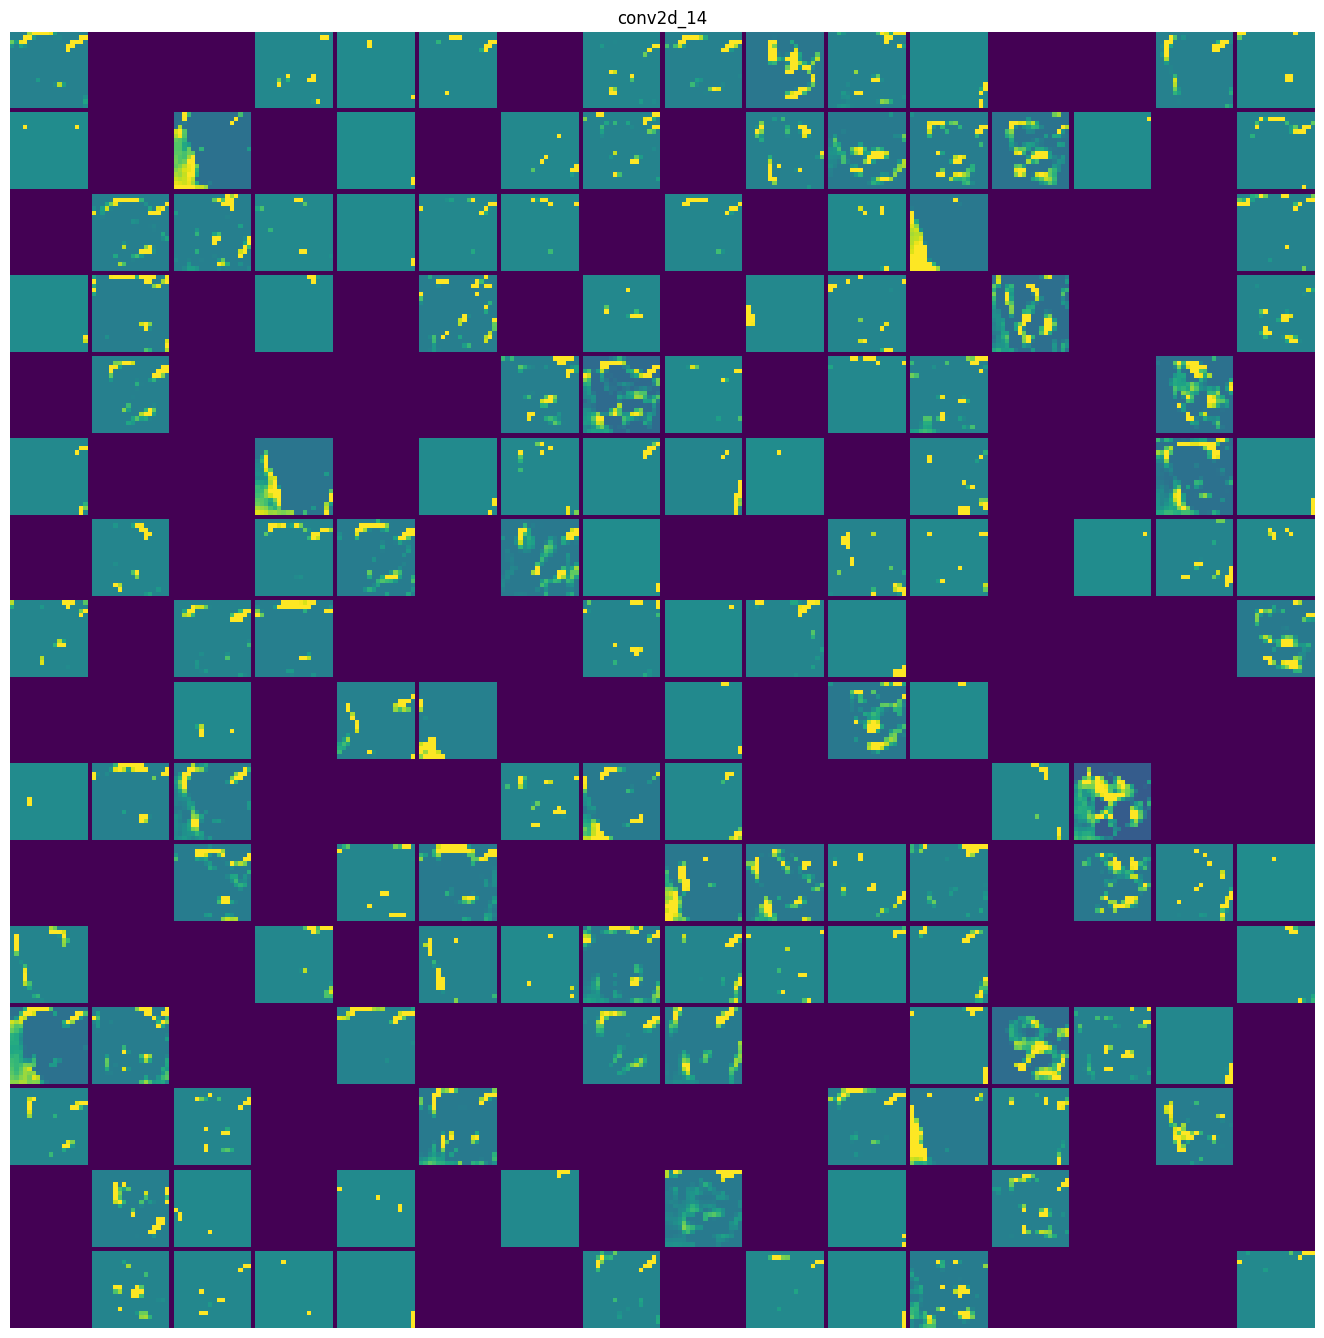

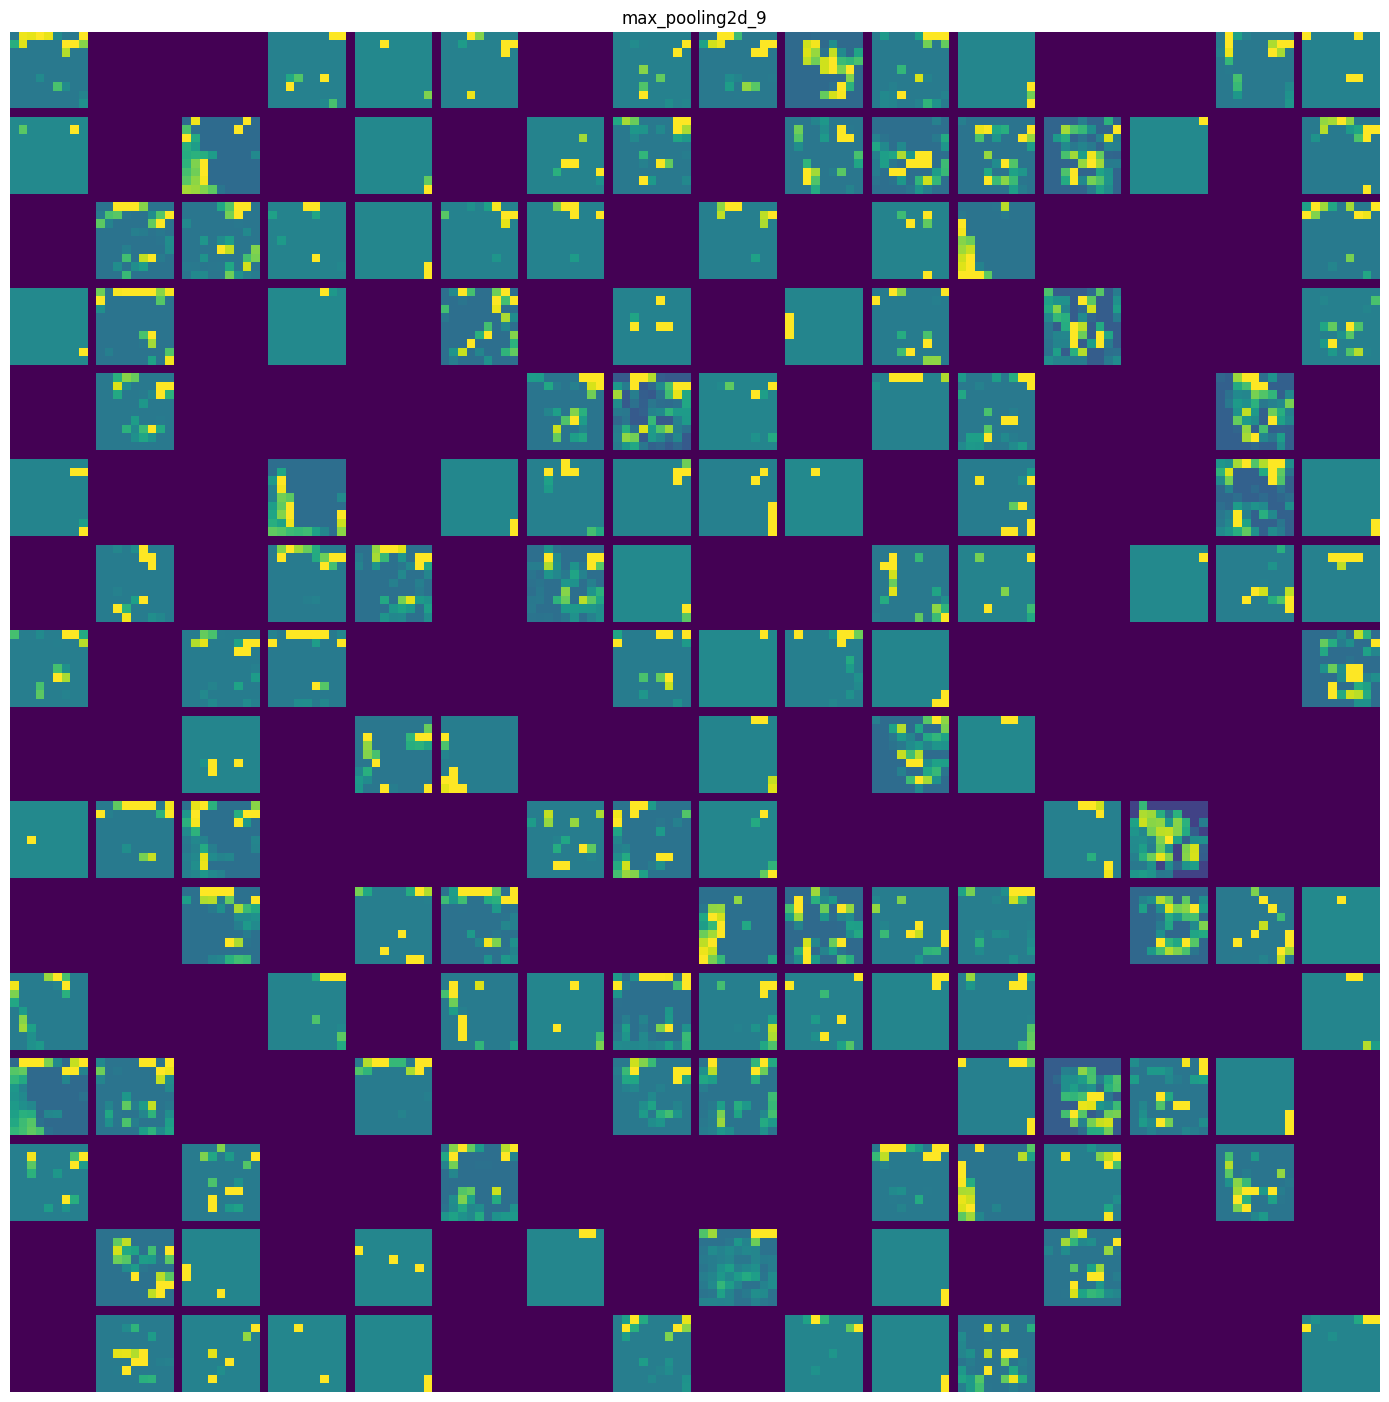

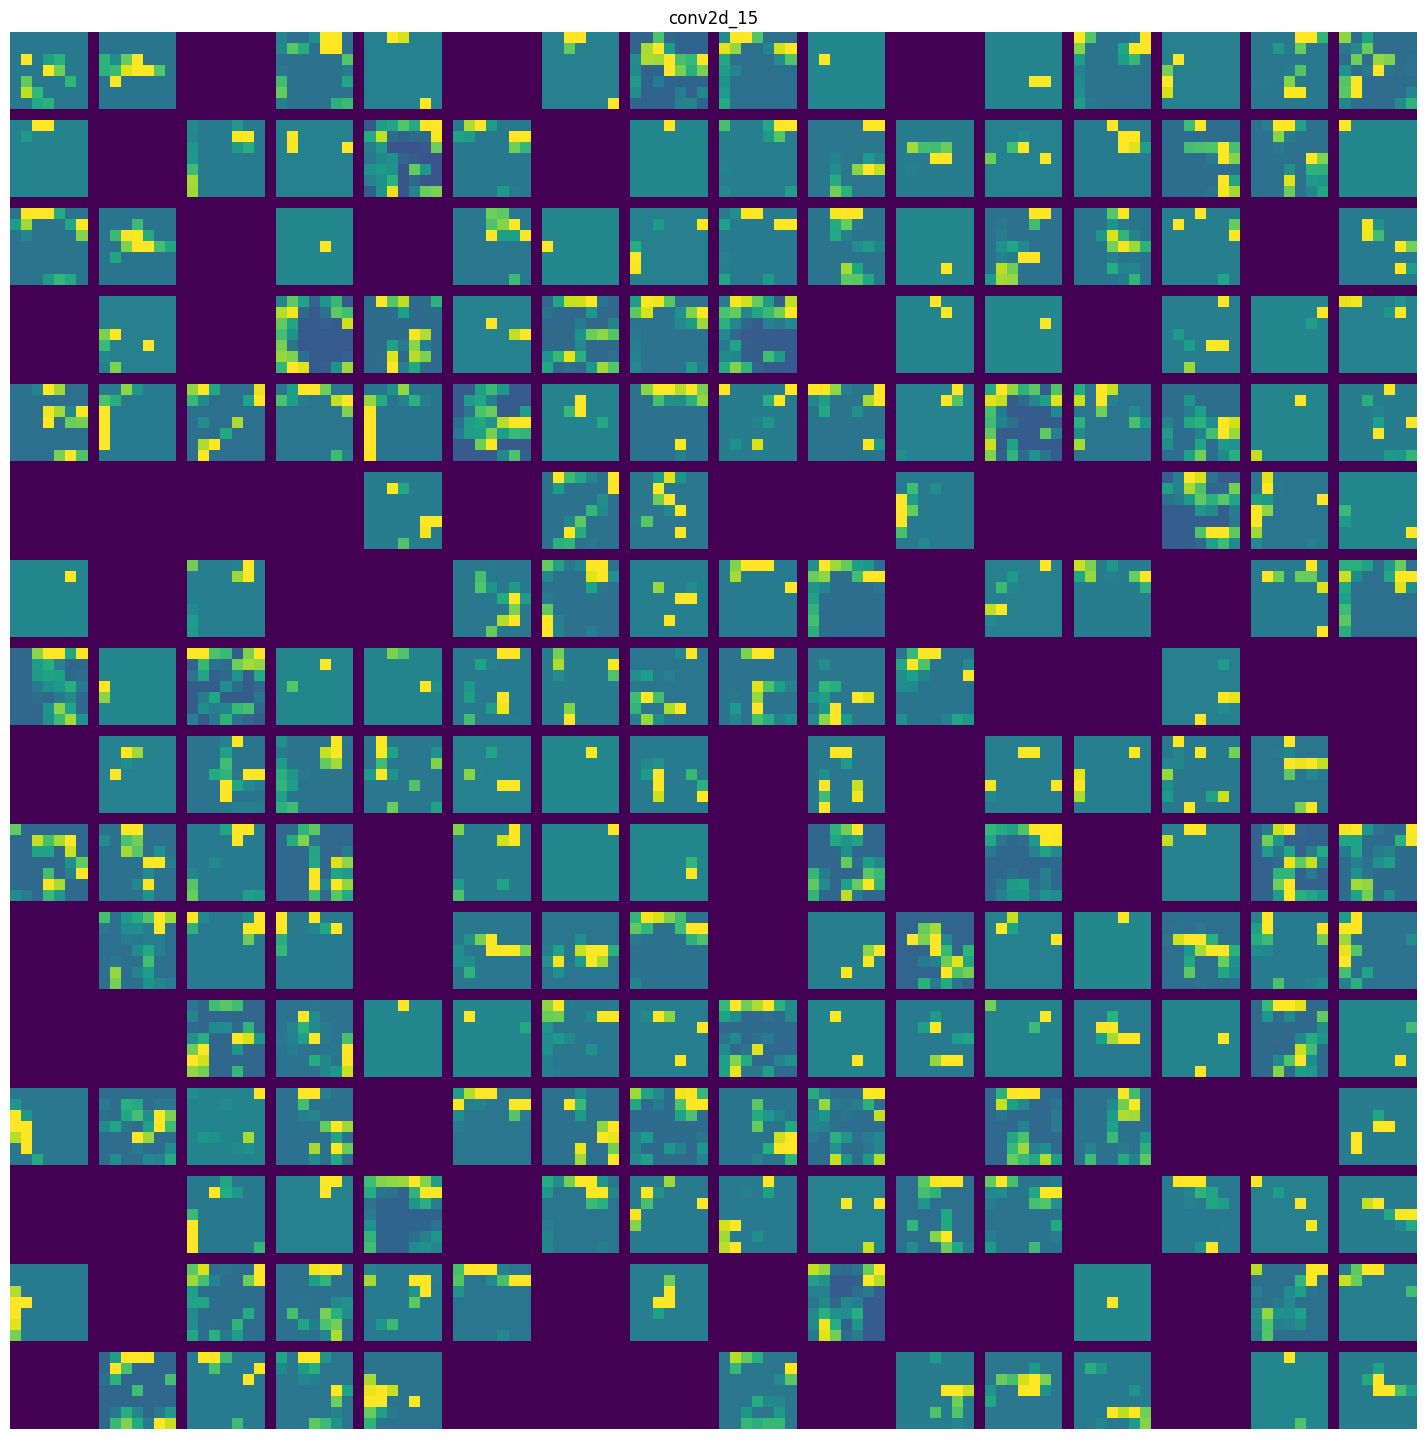

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  images_per_col = n_features // images_per_row
  display_grid = np.zeros((
      (size + 1) * images_per_col - 1, images_per_row * (size + 1) - 1
  ))
  for row in range(images_per_col):
    for col in range(images_per_row):
      channel_index = row * images_per_row + col
      channel_image = layer_activation[0, :, :, channel_index].copy()
      # To standardize and adjust the activation values,
      # so that the feature map can be displayed more intuitively.
      # This section also adjusts the original activation value to a visual range (0 to 255)
      # for easy visualization.
      if channel_image.sum() != 0:
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype("uint8")
      display_grid[
          row * (size + 1): (row + 1) * size + row,
          col * (size + 1): (col + 1) * size + col
      ] = channel_image
  # Adjust the overall display size of the grid according to the size of the feature map.
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(display_grid, aspect="auto", cmap="viridis")

- The role of the first layer is to act as a variety of edge detectors.
At this stage, the activation value retains almost all the information in the original image.
- As the number of layers increases, the activation value becomes more and more abstract and harder to interpret intuitively.
They began to represent higher-level concepts, such as "cat ears" and "cat eyes." The more layers there are, the less information there is in the layer representation about the visual content of the image and the more information there is about the category of the image.
- The sparsity of activation value increases with the increase of the number of layers. In the first layer, almost all filters are activated by the input image, but in the later layers, more and more filters are blank. That is, no pattern corresponding to these filters was found in the input image.



We have just revealed an important universal feature that deep neural networks learn to represent: as the number of layers increases, the features extracted by the layers become more and more abstract.
Higher level activation values contain less and less information about the specific input and more and more information about the target (in this case, the target is the image category: cat or dog).
Deep neural networks can effectively act as information distillation pipelines
It receives raw data (in this case, an RGB image) as input, transforms it repeatedly, filters out irrelevant information (such as the specific appearance of the image), and enlarges and refines useful information (such as the image category).


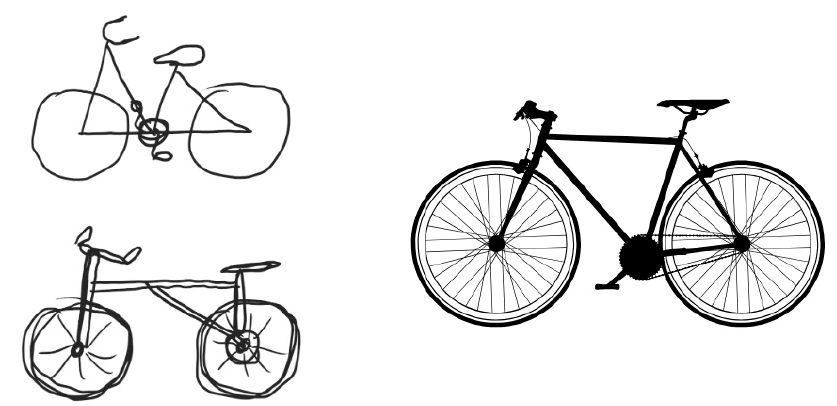

# Visuliazation of convolusional neural network filters

Another simple way to view the filters learned by a convolutional neural network is to display the visual patterns each filter responds to.
This is achieved by gradient ascent in the input space: starting with a blank input image, gradient descent is applied to the value of the input image of the convolutional neural network, the purpose of which is to maximize the response of a certain filter.
The resulting input image is the image of the maximum response of the selected filter.


Let's experiment with a filter for the Xception model pre-trained on ImageNet.

The process is simple: build a loss function whose purpose is to maximize the value of a filter in a convolution layer;
Random gradient descent is then used to adjust the value of the input image to maximize this activation value.



## Instantiating the Xception convolusional base

In [ ]:
model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
# The classification layer is not relevant for this example,
# so the top layer of the model is not included here.

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Printing the names of all convolutional layers in Xception

In [ ]:
for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


## Creating a feature extractor model

In [ ]:
layer_name = "block3_sepconv1"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

Using the feature extractor

In [ ]:
activation = feature_extractor(
    keras.applications.xception.preprocess_input(img_tensor)
)

We use the feature extractor model to define a function. This function returns a scalar value that quantifies how much a given input image "activates" a filter in that layer. This function is the "Loss function" that we want to maximize during the gradient rise(Gradient Ascent).

In [ ]:
import tensorflow as tf

def compute_loss(image, filter_index):
  activation = feature_extractor(image)
  filter_activation = activation[:, 2: -2, 2: -2, filter_index]
  return tf.reduce_mean(filter_activation)

## Loss maximization via stochastic gradient ascent

In [ ]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(image)
    loss = compute_loss(image, filter_index)
  grads = tape.gradient(loss, image)
  grads = tf.math.l2_normalize(grads)
  image += learning_rate * grads
  return image

Function to generate filter visualizations

In [ ]:
img_height = 200
img_width = 200

def generate_filter_pattern(filter_index):
  iterations = 15
  learning_rate = 10.
  image = tf.random.uniform(
      minval=0.4, maxval=0.6, shape=(1, img_width, img_height, 3)
  )
  for i in range(iterations):
    image = gradient_ascent_step(image, filter_index, learning_rate)
  return image[0].numpy()

## Utility function to convert a tensor into a valid image

The resulting image tensor is a set of floating point numbers of the shape (200, 200, 3) whose values may not be integers in the range [0, 255]. Therefore, we need to post-process this tensor to convert it into a displayable image.

In [ ]:
def deprocess_image(image):
  image -= image.mean()
  image /= image.std()
  image *= 64
  image += 128
  image = np.clip(image, 0, 255).astype("uint8")
  image = image[25: -25, 25: -25, :]
  return image

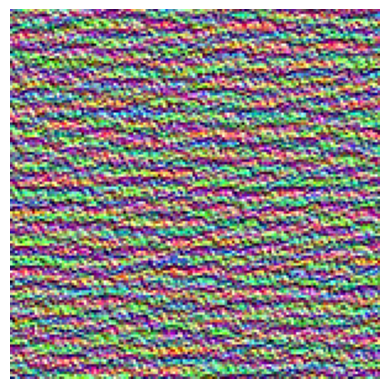

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))

It appears that the second filter in the block3_sepconv1 layer responds to a horizontal line pattern, somewhat like water or fur.


Generating a grid of all filter response patterns in a layer

In [ ]:
all_images = []
for filter_index in range(64):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

# Visualization of activation heat maps

We also cover one final visualization method, which helps to understand which parts of an image make the convolusional neural networks make the final classification decision. It helps to "debug" the decision process of convolusional neural networks, especially in the case of classification errors (this problem domain is called model interpretability_. This method can also locate specific objects in the image.

Tjos common technique, called class activation map (CAM) visualization, generates a class activation het map of the input image. A class activation het map is a two-demensional gird of scores associated with an output class that calculates a score for each position in the input image, representing the importance of taht position to that class. For example, for an input image of a convolutional neural netwok for cat and dog classification, CAM vosia;ozatopm cam gemerate a heat map of the category "cat", indicating how similar various parts of the image are to cats; A heat map of the category "dog" can also be generated, indicating how similar various parts of the image are to dogs.

Loading the Xception network with pretrained weights

In [ ]:
model = keras.applications.xception.Xception(weights="imagenet")

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Preprocessing an input image for Xception

In [ ]:
img_path = "/content/elephant.jpg"

def get_img_array(img_path, target_size):
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  array = keras.applications.xception.preprocess_input(array)
  return array

img_array = get_img_array(img_path, target_size=(299, 299))

In [ ]:
img_array.shape

(1, 299, 299, 3)

In [ ]:
preds = model.predict(img_array)
print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('n02504458', 'African_elephant', np.float32(0.8699399)), ('n01871265', 'tusker', np.float32(0.0769561)), ('n02504013', 'Indian_elephant', np.float32(0.023541728))]


The model has identified a variable number of African elephants in the images. The most activated element in the prediction vector corresponds to the "African Elephant" category, whose index is 386

In [ ]:
np.argmax(preds[0])

np.int64(386)

Setting up a model that returns the last convolutional output

In [ ]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions"
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

Reapplying the classifer on top of the last convolutional output

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)

classifier_model = keras.Model(classifier_input, x)

Retrieving the gradients of the top predicted class

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(img_array)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_168']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


Gradient pooling and channel-importance weighting

In [ ]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

Heatmap post-processing

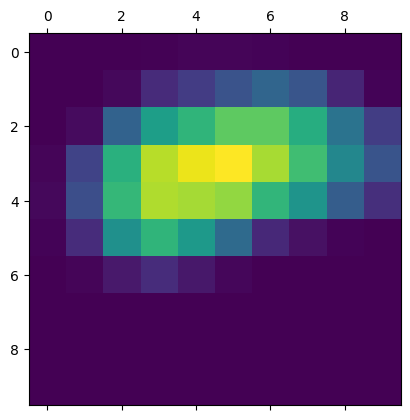

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

Superimposing the heatmap on the original picture

In [ ]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "elephant_cam.jpg"

superimposed_img.save(save_path)

/tmp/ipython-input-3198324747.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


This visualization method answers two important questions:

- Why does the model think this image contains African elephants?
- Where is the African elephant in the image?

Of particular note was the high intensity of activation in the young elephants' ears, which may how the model distinguished between African and Indian elephants